
### <center>Procesamiento Digital de Señales de Audio</center>
#### <center>Instituto de Ingeniería Eléctrica - UdelaR</center>
# Hoja de Ejercicios 3 - Curso 2024
## Análisis de Fourier de tiempo corto
### Procesamiento tiempo-frecuencia


## Pautas para el práctico
 - La realización del presente trabajo es individual.
 - Es necesario abordar todos los ejercicios propuestos.
 - Se espera la entrega de un PDF escrito en $\LaTeX$ o similar. El mismo tendrá:
     - Máximo de 14 páginas
     - Máximo de 2500 palabras
 - También se espera la entrega del código escrito, en scripts Python o en este mismo Jupyter Notebook.
 - La corrección del práctico se hará sobre lo entregado en el PDF, pero podremos apoyarnos en el razonamiento y comprensión demostrado en el código escrito. Recomendamos escribir el código de forma prolija para facilitar la comprensión presente y futura tanto de nosotros como de ustedes.
 - Los ejercicios marcados como $\blacklozenge$ son opcionales.


**Nombre de el/la estudiante:** Silvina Datz

### Cómo correr este notebook

Es posible descargarlo y correrlo localmente en su computadora

Tambien pueden correrlo en Google Colab usando el siguiente link.

<table align="center">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/mrocamora/audio-dsp/blob/main/practicos/AudioDSP_Practico_3.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Correr en Google Colab</a>
  </td>
</table>

In [1]:
# Al correr esta celda, se podrá acceder a archivos
# y carpetas en su cuenta de google drive.
# Puede ver la estructura de carpetas apretando en
# el icono de carpeta de la barra lateral izquierda.
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
# Directorio de archivos
dir_files = './Archivos_P3/'

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import io, signal
import pandas as pd
from IPython.display import Audio

# Ejercicio 1

En este ejercicio se estudia la relación entre la transformada de Fourier de tiempo corto y la función de autocorrelación de tiempo corto. Si definimos la densidad espectral de potencia en tiempo corto de una señal ($x[n]$) en función de su transformada de Fourier en tiempo corto como

\begin{equation*}
	S_n(e^{jw}) = |X_n(e^{jw})|^2
\end{equation*}

y la función de autocorrelación de tiempo corto de la señal ($x[n]$) como

\begin{equation*}
	R_n[k] = \sum_{m=-\infty}^{\infty}w[n-m]x[m]w[n-k-m]x[m+k],
\end{equation*}

probar que si

\begin{equation*}
	X_n(e^{jw}) = \sum_{m=-\infty}^{\infty}x[m]w[n-m]e^{-jwm}
\end{equation*}

$R_n[k]$ y $S_n(e^{jw})$ son un par de transformadas, i.e. $S_n(e^{jw})$ es la transformada de Fourier de $R_n[k]$.


$$\begin{align*}
    \mathcal{F}\{ R_n[k] \}  &= \sum_{k=-\infty}^{\infty}  R_n[k]e^{-jwk} \\
    &= \sum_{k=-\infty}^{\infty} \left( \sum_{m=-\infty}^{\infty} w[n-m]x[m]w[n-k-m]x[m+k] \right) e^{-jwk}  \\
    &=  \sum_{m=-\infty}^{\infty} \sum_{k=-\infty}^{\infty} w[n-m]x[m]w[n-k-m]x[m+k] e^{-jwk} \\
    &= \sum_{m=-\infty}^{\infty} w[n-m]x[m] \sum_{k=-\infty}^{\infty} w[n-k-m]x[m+k] e^{-jwk} \\
    % \text{Cambio de variable: } l  &= m+k \\
    &\overset{\text{CV: } l = m+k}{=}  \sum_{m=-\infty}^{\infty} w[n-m]x[m] \sum_{l=-\infty}^{\infty} w[n-(l-m)-m]x[l] e^{-jw(l-m)}\\
    &= \sum_{m=-\infty}^{\infty} w[n-m]x[m]e^{jwm} \sum_{l=-\infty}^{\infty} w[n-l]x[l] e^{-jwl} \\
    &= X_n^*(e^{jw}) X_n(e^{jw})\\
    &=  |X_n(e^{jw})|^2 \\
    &=  S_n(e^{jw}) \\
\end{align*}$$

# Ejercicio 2

En este ejercicio se estudia un método de detección de frecuencia fundamental (o _pitch_) basado en la transformada de Fourier de tiempo corto. Se sugiere utilizar el archivo [_LP-mem-6-a.wav_](./Archivos_P3/LP-mem-6-a.wav) para probarlo.

## Parte 1
El producto armónico espectral -Harmonic Product Spectrum, HPS- (ver _Pitch Detection in the Spectral Domain, pág. 623_, en  L. R. Rabiner and R. W. Schafer, _Theory and Applications of Digital Speech Processing_. Prentice Hall, 1st ed., 2011 [1]) está dado por

\begin{equation*}
	P_n(e^{jw}) = \prod_{r=1}^{K}|X_n(e^{jwr})|^2
\end{equation*}

Tomando el logaritmo se obtiene (log-Harmonic Product Spectrum, log-HPS),

\begin{equation*}
	\hat{P}_n(e^{jw}) = 2\sum_{r=1}^{K}\log|X_n(e^{jwr})|
\end{equation*}

**_Responder:_**

Explique por qué el HPS puede usarse para detección de _pitch_. Asuma que la señal de audio es monofónica (una única fuente armónica). ¿Qué ventajas presenta el uso del log-HPS frente al HPS? ¿Qué ocurre con señales cuya frecuencia fundamental está ausente (e.g. filtrado pasa-altos por el canal de comunicación)?


_Respuesta:_

El HPS funciona comprimiendo la escala de frecuencias por factores enteros y multiplicando los espectros resultantes. Las frecuencias donde los armónicos coinciden sobreviven a este proceso. En una señal monofónica, la frecuencia fundamental es la única que tiene múltiplos enteros de sí misma en el espectro (armónicos), lo que provoca que, al comprimir, dichos armónicos se alineen en la frecuencia fundamental, permitiendo así su detección.

En el caso en que la frecuencia fundamental esté ausente pero sus armónicos estén presentes, el log-HPS tiene una ventaja, al convertir el producto en una suma de logaritmos, la ausencia de un componente (como la fundamental) no anula el resultado global. Los armónicos comprimidos se sumarán de manera constructiva, permitiendo que el pitch sea detectado a pesar de la falta de la frecuencia fundamental.

Tanto el HPS como el log-HPS son robustos frente al ruido aditivo independiente, ya que el ruido tiende a no tener una estructura coherente en el espectro

## Parte 2

El espectro logarítmico acumulado (ó GLogS por sus siglas en inglés), se calcula como el promedio de logaritmo de la magnitud del espectro en posiciones armónicas de una frecuencia fundamental $f_0$, como

\begin{equation*}
	\rho_n(f_0) = \frac{1}{n_H}\sum_{i=1}^{n_H}\log|X_n(if_0)|
\end{equation*}

siendo $n_H$ la cantidad de armónicos de $f_0$ cuya frecuencia es menor a cierta frecuencia máxima $f_{\max}$.

Implemente un algoritmo de detección de _pitch_ que calcule el GLogS para valores de $f_0$ distribuidos de forma logarítmica entre $55Hz$ ($A1$) y $1046.5Hz$ ($C6$) con un paso de cuarto de tono, y $f_{\max} =  5000Hz$.

In [4]:
sr, data = io.wavfile.read(dir_files+'LP-mem-6-a.wav')
Audio(data=data, rate=sr)

In [5]:
def glogs(x, fs, f0_min, f0_max, f_max, window_size=2048):
    """
    Calcula el GLogS (Generalized Logarithmic Spectrum) para un rango de frecuencias fundamentales entre f0_min y f0_max a un paso de cuarto de tono.

    Parameters:
        x (array): Señal de audio.
        fs (int): Frecuencia de muestreo de la señal de audio.
        f0_min (float): Frecuencia mínima a evaluar.
        f0_max (float): Frecuencia máxima a evaluar.
        f_max (float): Frecuencia máxima a considerar en la suma de armónicos.
        window_size (int): Tamaño de la ventana en muestras para calcular la STFT.
    
    Returns:
        t (array): Vector de tiempos.
        f0s (array): Vector de frecuencias fundamentales.
        glogs_matrix (array): Matriz de GLogS.
    """
    
    # Calcular STFT
    f, t, X = signal.stft(x, fs=fs, nperseg=window_size, noverlap=window_size//2)
    
    # Generar frecuencias a evaluar el GLogS
    n_semitonos = 12 * np.log2(f0_max / f0_min)     # Número de semitonos entre f0_min y f0_max
    n_cuartos_de_tono = int(n_semitonos * 2)        # Número de cuartos de tonos entre f0_min y f0_max
    f0s = f0_min * 2**(np.arange(0, n_cuartos_de_tono + 1) / (12 * 2))

    # Matriz para almacenar los valores de GLogS para cada ventana temporal y cada frecuencia fundamental
    glogs_matrix = np.zeros((len(t), len(f0s)))
    
    # Calcular GLogS para cada ventana temporal (n) y cada frecuencia fundamental (ind_f0)
    for n, X_n in enumerate(X.T):  # Iterar sobre las ventanas temporales
        for ind_f0, f0 in enumerate(f0s): # Iterar sobre las frecuencias fundamentales

            # Número de armónicos a considerar (n_H)
            n_harmonics = f_max // f0
            
            # Frecuencias de los armónicos (i*f_0)
            harmonic_freqs = f0 * np.arange(1, n_harmonics + 1)
            
            # Calcular harmonic_indices
            harmonic_indices = [np.argmin(np.abs(f - h_freq)) for h_freq in harmonic_freqs]
            
            if len(harmonic_indices) > 0:
                # Calcular |X_n(i*f_0)|
                magnitudes = np.abs(X_n[harmonic_indices])
                # Evitar log(0) agregando un pequeño valor
                magnitudes = np.maximum(magnitudes, 1e-10)
                # Calcular GLogS
                glogs_matrix[n, ind_f0] = np.mean(np.log(magnitudes))
    
    return t, f0s, glogs_matrix

In [6]:
f_A1 = 55.0
f_C6 = 1046.5
f_max = 5000

t, f0s, glogs_matrix = glogs(data, sr, f0_min=f_A1, f0_max=f_C6, f_max=f_max)

## Parte 3

1. Utilice el GLogS para obtener una representación tiempo-$f_0$, que denominaremos $f_0$-grama. Compare dicha representación con el espectrograma usando el archivo de audio [_LP-mem-6-a.wav_](./Archivos_P3/LP-mem-6-a.wav).

2. **Responder:** ¿por qué tiene sentido utilizar $f_{max} = 5000~Hz$?

$\qquad$ _Nota:_ Puede ser de utilidad observar el espectrograma completo.

3. Represente la frecuencia fundamental detectada y la frecuencia de referencia en el $f_0$-grama en el archivo [_LP-mem-6-a.txt_](./Archivos_P3/LP-mem-6-a.txt). **Comente si aparecen los errores de armónicos y por qué**.

1.

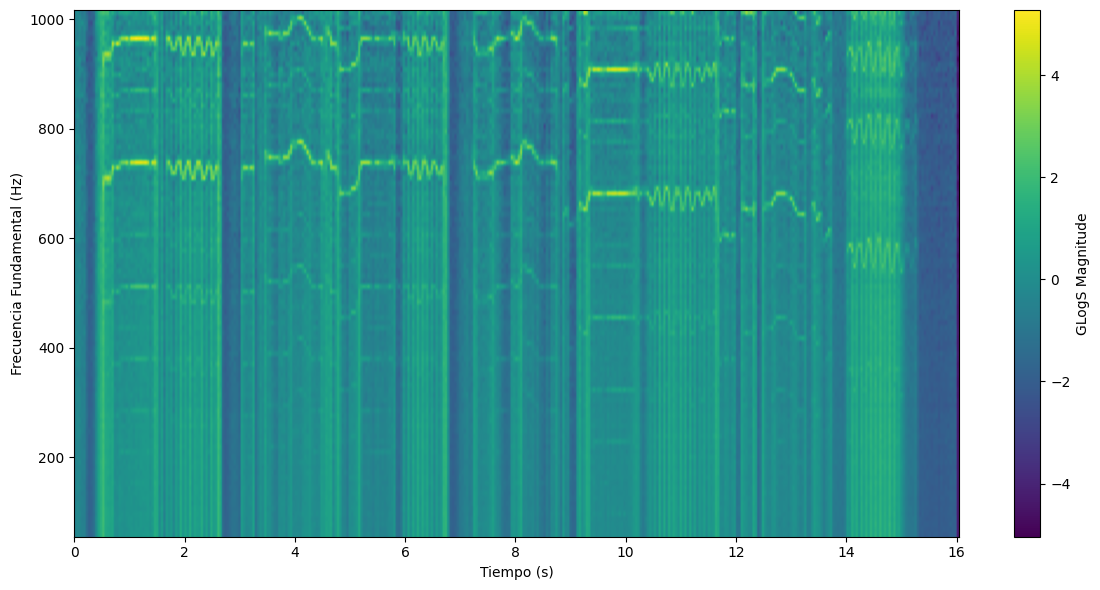

In [7]:
plt.figure(figsize=(12, 6))
plt.imshow(glogs_matrix.T, aspect='auto', origin='lower', 
           extent=[t[0], t[-1], f0s[0], f0s[-1]])
plt.colorbar(label='GLogS Magnitude')
plt.xlabel("Tiempo (s)")
plt.ylabel("Frecuencia Fundamental (Hz)")
# plt.title("f0-grama")
plt.tight_layout()
plt.savefig(dir_files+'ej2-f0-grama.png', dpi=300)
plt.show()

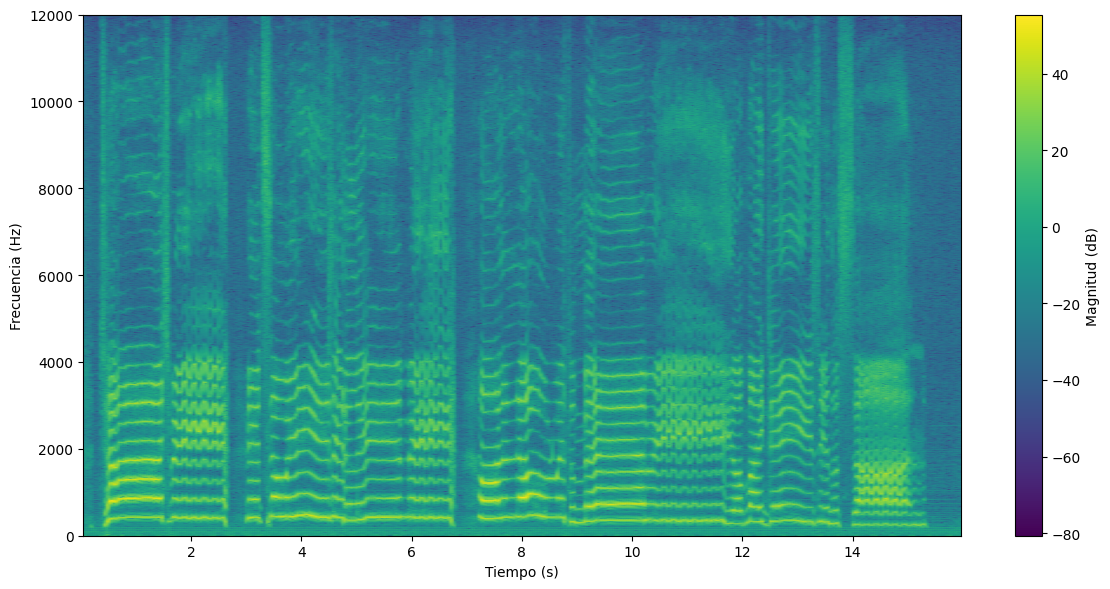

In [8]:
f_, t_, Sxx = signal.spectrogram(data, fs=sr, nperseg=2048, noverlap=1024)
plt.figure(figsize=(12, 6))
plt.pcolormesh(t_, f_, 10 * np.log10(Sxx), shading='gouraud')
plt.colorbar(label='Magnitud (dB)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Frecuencia (Hz)')
# plt.title('Espectrograma')
plt.tight_layout()
plt.savefig(dir_files+'ej2-espectograma.png', dpi=300)
plt.show()

Comparación entre el f0-grama y el espectrograma:


El f0-grama muestra la energía acumulada en las posiciones armónicas para cada posible frecuencia fundamental, mientras que el espectrograma muestra la energía en todas las frecuencias.
En el f0-grama se pueden observar patrones más claros para la detección del pitch, ya que concentra la información de los armónicos en una sola representación.
Las zonas más brillantes (amarillas/verdes claras) en el f0-grama indican mayor probabilidad de que esa sea la frecuencia fundamental.

2.

Sobre el uso de fmax = 5000 Hz:
Tiene sentido usar este valor por varias razones:


Observando el espectrograma completo, la mayoría de la energía armónica significativa está por debajo de los 5000 Hz

Para voces humanas, los primeros 4-5 armónicos son los más importantes para la percepción del pitch

Los armónicos superiores a 5000 Hz tienden a tener menor energía y podrían introducir ruido en el cálculo del GLogS

Este límite permite capturar suficientes armónicos para las frecuencias fundamentales más bajas (por ejemplo, para f0=100Hz podríamos capturar hasta 50 armónicos) mientras se evita incluir componentes menos relevantes

3.

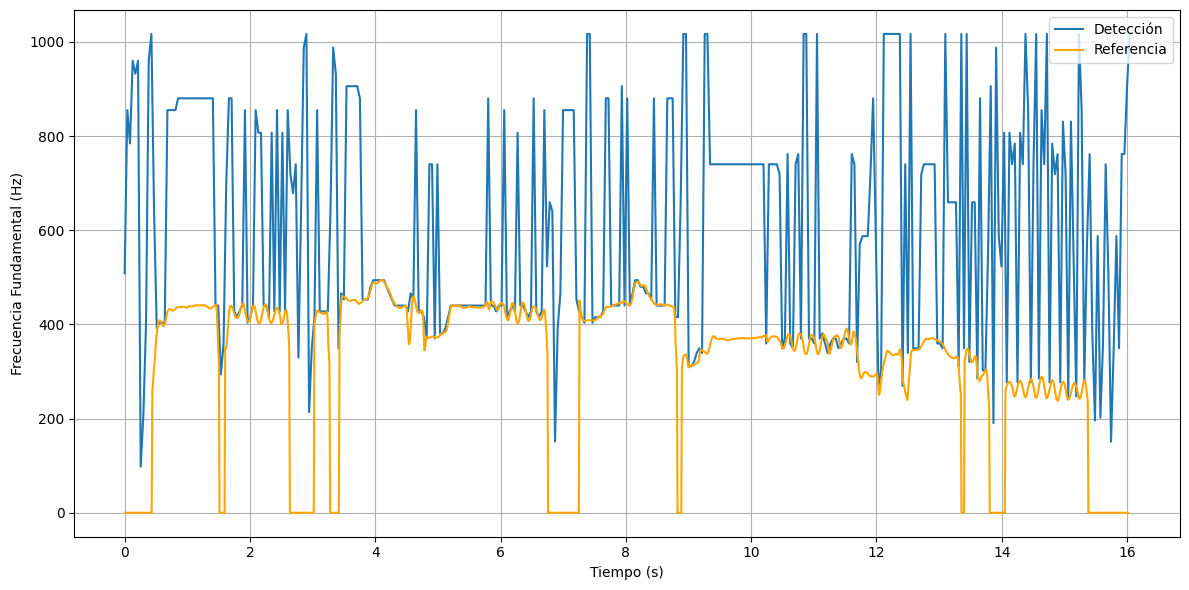

In [9]:
ref_data = np.loadtxt(dir_files+'LP-mem-6-a.txt')

plt.figure(figsize=(12, 6))
plt.plot(t, f0s[np.argmax(glogs_matrix, axis=1)], label='Detección')
plt.plot(ref_data[:, 0], ref_data[:, 1], label='Referencia', color='orange')
plt.ylabel('Frecuencia Fundamental (Hz)')
plt.xlabel('Tiempo (s)')
plt.grid()
plt.legend(loc='upper right')
plt.tight_layout()
plt.savefig(dir_files+'ej2-deteccion-pitch.png', dpi=300)
plt.show()

Sobre los errores de armónicos:
En la gráfica de comparación entre la estimación y la referencia se pueden observar varios saltos donde la estimación duplica o triplica la frecuencia fundamental de referencia. Esto ocurre por varias razones:


El algoritmo GLogS puede confundir los armónicos con la fundamental debido a que también presentan una estructura armónica

Cuando el segundo o tercer armónico tienen más energía que la fundamental, el algoritmo puede interpretarlos erróneamente como la frecuencia fundamental
Estos errores son especialmente visibles en las transiciones entre notas o en segmentos donde la fundamental es más débil

Este es un problema común en los algoritmos de detección de pitch y es una de las razones por las que se suelen implementar post-procesamientos y restricciones adicionales para mejorar la robustez.

# Ejercicio 3

En este ejercicio teórico, recordamos la condición la síntesis de la STFT discreta mediante el método Overlap-Add (OLA), de que la suma de las ventanas en el tiempo debe ser igual a una constante, y buscaremos probar que esto se cumple bajo ciertas condiciones para el caso de las ventanas de Hann. 

Las ventanas de Hann, comúnmente usadas en análisis y síntesis mediante OLA, se definen para el caso de una ventana de largo 2M+1 de la manera siguiente:

\begin{equation*}
    w_{Hann}[n]=[0.5 + 0.5cos(\pi n/M)]w_r[n]
\end{equation*}

donde $w_r[n]$ es una ventana rectangular que representa el requerimiento de the $w_{Hann}[n]=0$ cuando $|n|>M$. Esta ventana podría ser de la forma

\begin{equation*}
    w_r[n]=
            \begin{cases}
                1, & -M \leq n \leq M-1 \\
                0, & \text{en otro caso}.
            \end{cases}
\end{equation*}

## Parte 1
Mostrar que la DTFT de $w_r[n]$ es

\begin{equation*}
    W_r(e^{j\omega}) = \bigg(\frac{1-e^{-j\omega 2M}}{1-e^{-j\omega}}\bigg)e^{j\omega M}
\end{equation*}


$$\begin{align*}
W_r(e^{j\omega})  &= \sum_{n=-\infty}^{\infty}  w_r[n]e^{-j\omega n}  \\
    &=   \sum_{n=-M}^{M-1} e^{-j\omega n}\\
    &\overset{\text{CV: } k=n+M}{=}  \sum_{k=0}^{2M-1} e^{-j\omega (k-M)}\\
    &=  \sum_{k=0}^{2M-1} e^{-j\omega k}e^{j\omega M} \\
    &=  e^{j\omega M} \sum_{k=0}^{2M-1} (e^{-j\omega})^k\\
    &\overset{\text{Serie geométrica}}{=} e^{j\omega M} \frac{1-(e^{-j\omega})^{2M}}{1- e^{-j\omega}}   \\
    &=   \left(\frac{1-e^{-j\omega 2M} }{1- e^{-j\omega}} \right)e^{j\omega M}\\
\end{align*}$$

## Parte 2
**Mostrar que**

\begin{equation*}
    W_{Hann}(e^{j\omega}) = 0.5W_r(e^{j\omega}) +0.25 W_r(e^{j(\omega-\pi/M)})+0.25 W_r(e^{j(\omega+\pi/M)})
\end{equation*}

*Nota:* puede ser de utilidad representar la función $\cos (\pi n /M)$ de $w_{Hann}[n]$ en su formulación de exponenciales complejas.

-------------

Es posible probar, utilizando el resultado de la parte anterior, que $W_{Hann}(e^{j\omega})$ depende solamente de $\omega$ y $M$, **resultando en la siguiente expresión**:

\begin{align*}
W_{Hann}(e^{j\omega}) &= 2j\sin(\omega M) \left[ \frac{1}{2} \left( \frac{1}{1-e^{-j\omega}} \right) - \frac{1}{4} \left( \frac{1}{1-e^{-j(\omega-\pi /M)}}\right) - \frac{1}{4} \left( \frac{1}{1-e^{-j(\omega+\pi /M)}}\right) \right]
\end{align*}

No es necesario demostrar cómo se llega a esta expresión ($\blacklozenge$), pero será de utilidad este resultado para continuar con las siguientes partes.

$$\begin{align*}
w_{Hann}[n]  &= \left[\frac{1}{2} + \frac{1}{2} \cos \left(\frac{\pi n}{M} \right) \right]w_r[n]  \\
    &=  \left[\frac{1}{2} + \frac{1}{2} \frac{e^{j n \frac{\pi}{M}} + e^{-j n\frac{\pi}{M}}}{2} \right]w_r[n] \\
    &=  \frac{1}{2}w_r[n] + \frac{1}{4} e^{j n \frac{\pi}{M}} w_r[n] + \frac{1}{4} e^{-j n \frac{\pi}{M}}w_r[n] \\
W_{Hann}(e^{j\omega})  &= \frac{1}{2} W_r (e^{j\omega}) + \frac{1}{4}  W_r (e^{j(\omega - \frac{\pi}{M})}) + \frac{1}{4}  W_r (e^{j(\omega + \frac{\pi}{M})})\\
\end{align*}$$

## Parte 3
Usar los resultados de las partes anteriores para demostrar que $W_{Hann}(e^{j\omega_k}) = 0$ para todo $k=1,2,...,M-1$ (con $\omega_k=\frac{2\pi k}{M}$) y por lo tanto es posible una reconstrucción perfecta si $R=M$ o $R=M/2$ (si $M/2$ es un entero), siendo $R$ el período de muestreo (en muestras) en el tiempo de la STFT. Ver cap 7.5 en [1].

_Sugerencia:_ notar que la reconstrucción perfecta con OLA implica la siguiente igualdad:
$$
y[n] = x[n]\left( \sum_{r=-\infty}^{+\infty} w_{Hann}[rR-n] \right) = x[n],
$$

$\qquad$ donde $x[n]$ es la señal a analizar e $y[n]$ la re-síntesis/reconstrucción.

$W_{Hann}(e^{j\omega})\Big|_{\omega=\omega_k=\frac{2\pi k}{M}} = 2j \underbrace{\sin(2\pi k)}_{= 0} \underbrace{\left[ \frac{1}{2} \left( \frac{1}{1-e^{-j\frac{2\pi k}{M}}} \right) - \frac{1}{4} \left( \frac{1}{1-e^{-j(\frac{2\pi k}{M} -\frac{\pi}{M})}}\right) - \frac{1}{4} \left( \frac{1}{1-e^{-j(\frac{2\pi k}{M}+\frac{\pi}{M})}}\right) \right]}_{\neq 0} = 0$ para $k=1,2,...,M-1$

Notar que para $k=0$, $W_{Hann}(e^{j 0}) \neq 0$

Para tener reconstrucción perfecta ($y[n] = x[n]$), necesitamos: $\sum_{r=-\infty}^{+\infty} w_{Hann}[rR-n] = C$ (constante $\neq 0$)

Por otro lado sabemos que $\sum_{r=-\infty}^{+\infty} w_{Hann}[rR-n] = \frac{1}{R} \sum_{k=0}^{M-1} W_{Hann}(e^{j\omega_k})= \frac{W_{Hann}(e^{j 0})}{R}$

- Si $R=M$: $\sum_{r=-\infty}^{+\infty} w_{Hann}[rM-n] = \frac{W_{Hann}(e^{j 0})}{M} =C_1 \neq 0$ 

- Si $R=\frac{M}{2}$: $\sum_{r=-\infty}^{+\infty} w_{Hann}[r\frac{M}{2}-n] = 2\frac{W_{Hann}(e^{j 0})}{M} =C_2\neq 0$ 

## Parte 4
Usar los resultados de las partes 1 y 2 para mostrar que $W_{Hann}(e^{j0}) = M$ y por lo tanto la ganancia de reconstrucción es $C=M/R$

$$\begin{align*}
W_{Hann}(e^{j0})  &=  \frac{1}{2} W_r (e^{j 0}) + \frac{1}{4}  W_r (e^{-j \frac{\pi}{M}}) + \frac{1}{4}  W_r (e^{j \frac{\pi}{M}}) \\
    &=  \frac{1}{2} \sum_{n=-\infty}^{\infty}  w_r[n]e^{j0n} + \frac{1}{4}  \left(\frac{1-e^{-j(- \frac{\pi}{M}) 2M} }{1- e^{-j (- \frac{\pi}{M})}} \right)e^{j (- \frac{\pi}{M}) M} + \frac{1}{4} \left(\frac{1-e^{-j \frac{\pi}{M} 2M} }{1- e^{-j \frac{\pi}{M}}} \right)e^{j \frac{\pi}{M} M} \\
    &=  \frac{1}{2} \sum_{n=-M}^{M-1}  1  +  \frac{1}{4}  \left(\frac{\overbrace{1-e^{j 2\pi }}^{= 0} }{1- e^{j  \frac{\pi}{M}}} \right)e^{-j\pi} + \frac{1}{4} \left(\frac{\overbrace{1-e^{-j 2 \pi }}^{= 0} }{1- e^{-j \frac{\pi}{M}}} \right)e^{j \pi}\\
    &=   \frac{1}{2} 2M  \\
    &=   M  \\
\end{align*}$$


La condición de reconstrucción perfecta requiere:
$\sum_{r=-\infty}^{+\infty} w_{Hann}[rR-n] = C$

En el dominio de la frecuencia, esto es equivalente a:
$\sum_{r=-\infty}^{+\infty} w_{Hann}[rR-n] = \frac{W_{Hann}(e^{j0})}{R}$

Por lo tanto, la ganancia de reconstrucción es $C=\frac{W_{Hann}(e^{j0})}{R}=\frac{M}{R}$. Esto significa que para obtener una reconstrucción perfecta ($y[n]=x[n]$), necesitamos escalar la salida por un factor de $R/M$ para compensar dicha ganancia.

# Ejercicio 4

En este ejercicio se implementa la técnica de phase-vocoder y se la utiliza para generar transformaciones de la señal de audio. Se sugiere utilizar el archivo [_singing\_voice.wav_](./Archivos_P3/singing_voice.wav) ó [_guitar\_lick.wav_](./Archivos_P3/guitar_lick.wav) para probarla.

En la etapa de análisis se calcula la transformada de Fourier de tiempo corto, como 

\begin{equation*}
    X_{n_a^u}(e^{j\omega_k})=\sum_{m=-\infty}^{\infty}w_a[n_a^u-m]\, x[m]\, e^{-j\omega_kn}
\end{equation*}

en donde, $w_a[n]$ es la ventana de análisis, $\omega_k=\frac{2\pi}{N} k$, con \(N\) la cantidad de puntos de la DFT, y $n_a^u = u \, R_a$, con $R_a$ el hop de análisis en muestras y $u$ el índice de la trama temporal, de valor inicial 0.

En la etapa de síntesis se reconstruye la señal en el dominio del tiempo mediante la antitransformada de Fourier de cada trama temporal y el procedimiento de solapamiento y suma (overlap-add), como 

\begin{equation*}
    y[n]=\sum_{u=-\infty}^{\infty}w_s[n-n_s^u]y_u[n-n_s^u]
\end{equation*}

con

\begin{equation*}
    y_u[n]=\frac{1}{N}\sum_{k=0}^{N-1}Y_{n_s^u}(e^{j\omega_k}) \, e^{j\omega_kn}
\end{equation*}

en donde, $w_s[n]$ es la ventana de síntesis, y $n_s^u=u \, R_s$, siendo $R_s$ el hop de síntesis en muestras. Notar que $y_u[n]$ es la transformada inversa de Fourier de una trama de la STFT. Cuando no hay modificaciones entre la etapa de análisis y síntesis, $Y_{n_s^u}(e^{j\omega_k}) = X_{n_a^u}(e^{j\omega_k})$ y $R_s = R_a$. En ese caso la ventana de síntesis $w_s[n]$ es opcional, pero se hace importante si se aplican modificaciones, por ejemplo cuando $R_s \neq R_a$.  
  
## Parte 1

Implemente el análisis y la síntesis para $Y_{n_s^u}(e^{j\omega_k})=X_{n_a^u}(e^{j\omega_k})$ y $R_s=R_a$. Elija un valor de $R_a$ para tener reconstrucción perfecta con ventana de Hann y verifique experimentalmente. Justifique su elección.

In [10]:
fs, x = io.wavfile.read(dir_files+'singing_voice.wav')
# fs, x = io.wavfile.read(dir_files+'guitar_lick.wav')

Audio(x, rate=fs)

In [11]:
def analysis_STFT(x, L, Ra, win='hann'):
    """ 
    Analysis phase of the phase vocoder.
    Compute the STFT of a signal x[n] using a window of length L and hop size Ra.
    """
    
    M = x.size
    N = L       # number of points to compute FFT
    window = signal.windows.get_window(win, L)
    num_frames = int(np.floor((M - L) / Ra)) + 1
    X_stft = np.zeros((N, num_frames), dtype = complex)
    for ind in range(num_frames):
        n_ini = int(ind * Ra)
        n_end = n_ini + L
        xr = x[n_ini:n_end] * window

        X_stft[:, ind] = np.fft.fft(xr, N)
 
    return X_stft

In [12]:
def synthesis_STFT(X_stft, L, Rs, win='hann'):
    """ 
    Synthesis phase of the phase vocoder.
    Compute the IFFT of each frame combined with overlap-add        
    """
    
    window = signal.windows.get_window(win, L)
    num_frames = X_stft.shape[1]
    y = np.zeros(num_frames * Rs + L)
    window_sum = np.zeros(y.shape)

    for ind in range(num_frames):
        yr = np.fft.ifft(X_stft[:, ind]).real

        n_ini = ind * Rs
        n_end = n_ini + L
        
        y[n_ini:n_end] += yr * window

        window_sum[n_ini:n_end] +=  window

    C = np.sum(window**2)/Rs
    y /= C
    
    return y

In [13]:
L = 2048
Ra = 512 # L/4
Rs = 512

# compute STFT
X_stft = analysis_STFT(x, L, Ra)
y = synthesis_STFT(X_stft, L, Rs)

In [14]:
Audio(y, rate=fs)

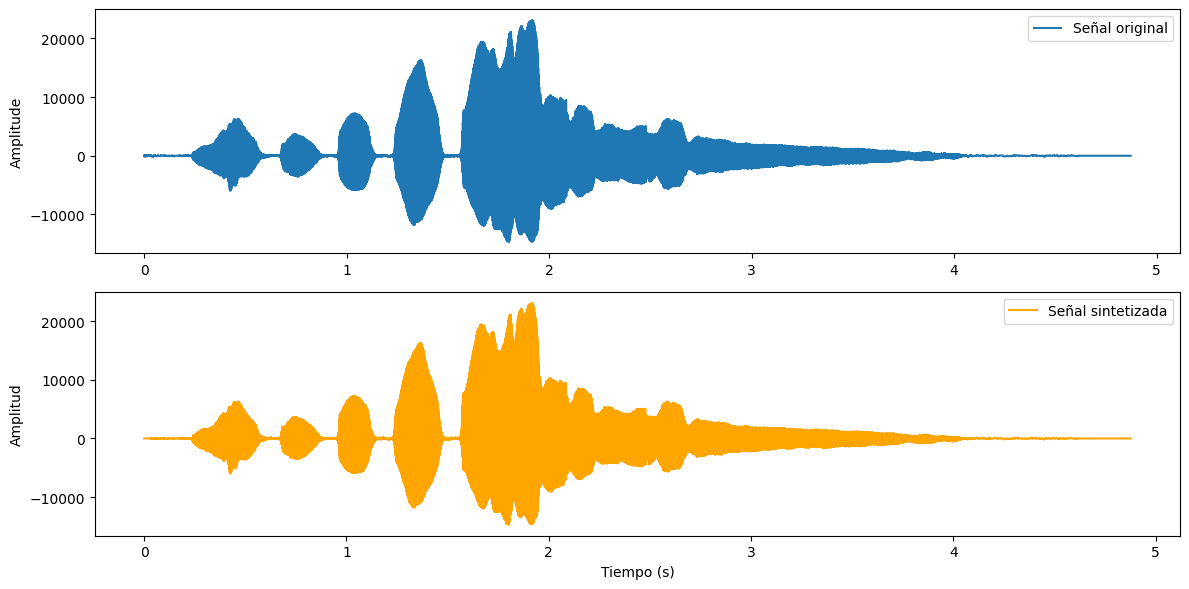

In [15]:
time_x = np.arange(0, x.size)/fs
time_y = np.arange(0, y.size)/fs

# plot the audio signal waveform
plt.figure(figsize=(12,6))
ax1 = plt.subplot(2, 1, 1)
plt.plot(time_x, x, label='Señal original')
plt.ylabel('Amplitude')
plt.legend()
ax1 = plt.subplot(2, 1, 2)
plt.plot(time_y, y, color='orange', label='Señal sintetizada')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.tight_layout()
plt.savefig(dir_files+'ej4-parte1.png', dpi=300)
plt.show()

## Parte 2

Realice modificaciones de la escala temporal usando $R_s \neq R_a$. En particular pruebe duplicando y reduciendo a la mitad la duración original. Analice los resultados obtenidos y los artefactos que se introducen.

In [16]:
L = 2048
Ra = 512
Rs = Ra*2 

# compute STFT
X_stft = analysis_STFT(x, L, Ra)
y = synthesis_STFT(X_stft, L, Rs)

In [17]:
Audio(y, rate=fs)

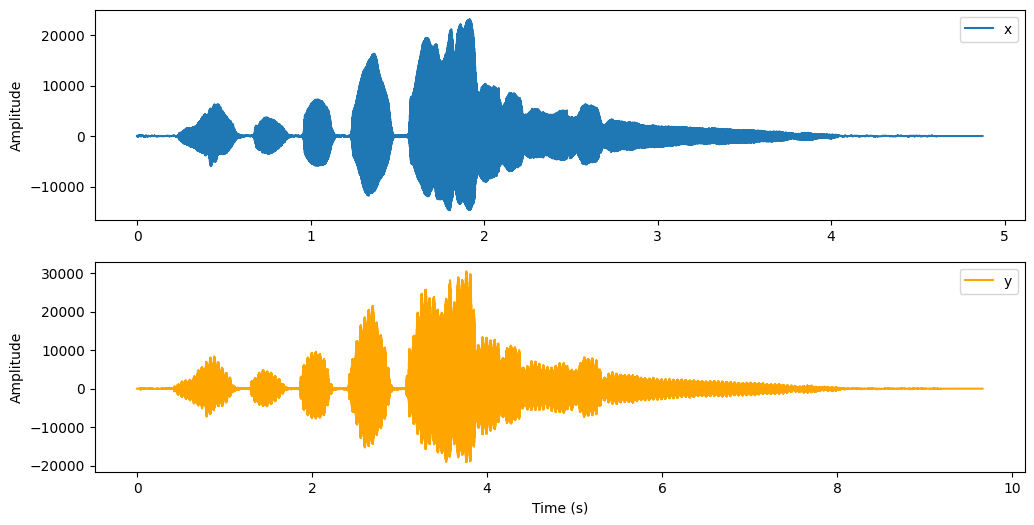

In [18]:
time_x = np.arange(0, x.size)/fs
time_y = np.arange(0, y.size)/fs

# plot the audio signal waveform
plt.figure(figsize=(12,6))
ax1 = plt.subplot(2, 1, 1)
plt.plot(time_x, x, label='x')
plt.ylabel('Amplitude')
plt.legend()
ax1 = plt.subplot(2, 1, 2)
plt.plot(time_y, y, color='orange', label='y')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

## Parte 3

Para evitar la mayoría de los problemas introducidos debido a la inconsistencia de fase, se sugiere utilizar el procedimiento de desdoblamiento de fase (phase unwrapping). 

Asumiendo que existe un solo componente sinusoidal por bin de la DFT, podemos plantear las siguientes ecuaciones para estimar la fase de $Y_{n_s^u}(e^{j\omega_k})$, cuando transformamos la escala temporal utilizando un hop de síntesis $R_s \neq R_a$. 

Se calcula el incremento de fase heterodino, a partir del incremento de fase de tramas sucesivas 

\begin{equation*}
    \Delta\Phi_k^u=\angle X_{n_a^u}(e^{j\omega_k}) - \angle X_{n_a^{u-1}}(e^{j\omega_k}) - R_a \, \omega_k
\end{equation*}

Notar que el término $R_a\ \omega_k$ es el incremento de fase que cabría esperar si la frecuencia del componente sinusoidal correspondiera exactamente a la frecuencia de análisis. 

Se toma el argumento principal de $\Delta\Phi_k^u$ entre ($-\pi, \pi$), que denominamos $\Delta_p\Phi_k^u$. 

Luego se calcula la estimación de la frecuencia instantánea

\begin{equation*}
    \hat{\omega}_k[{n^u_a}] = \omega_k + \frac{1}{R_a} \, \Delta_p\Phi_k^u
\end{equation*}

Finalmente se calcula la fase de $Y_{n_s^u}(e^{j\omega_k})$ utilizando la fórmula de propagación de fase

\begin{equation*}
    \angle Y_{n_s^u}(e^{j\omega_k}) = \angle Y_{n_s^{u-1}}(e^{j\omega_k}) + R_s \, \hat{\omega}_k[{n^u_a}]
\end{equation*}

Notar que de acuerdo a la fórmula anterior se hace necesario acumular la fase de tramas sucesivas y establecer un valor para la fase inicial (se sugiere considerar $\angle Y_{n_s^{0}}(e^{j\omega_k}) = \angle X_{n_a^{0}}(e^{j\omega_k})$). Cabe señalar que es importante aplicar una ventana de suavizado $w_s[n]$ en la síntesis. Se sugiere utilizar ventanas de Hann con $w_a[n] = w_s[n]$. Tenga en cuenta que esto modifica el factor de escalamiento temporal. Para profundizar en el estudio de este procedimiento y otras consideraciones sobre la fase se recomienda [2,3].


Implemente el desdoblamiento de fase y compare los resultados con los obtenidos en la parte anterior. 

In [19]:
def synthesis_STFT_unwrap_phase(X_stft, L, Rs, Ra, win='hann'):
    """
    Synthesis phase of the phase vocoder with phase unwrapping.
    Compute the IFFT of each frame combined with overlap-add, using phase unwrapping to maintain phase coherence.
    """
    window = signal.windows.get_window(win, L)
    num_frames = X_stft.shape[1]
    y = np.zeros(num_frames * Rs + L)
    
    # Frecuencias bin por bin
    omega_k = 2 * np.pi * np.arange(L) / L
    
    # Inicialización del espectro de síntesis
    Y_stft = np.zeros_like(X_stft)
    Y_stft[:, 0] = X_stft[:, 0]  # Primera trama igual a la original
    
    # Phase unwrapping y propagación de fase
    for ind in range(1, num_frames):
        # Calculamos el incremento de fase heterodino
        delta_phi = np.angle(X_stft[:, ind]) - np.angle(X_stft[:, ind-1]) - Ra * omega_k
        
        # Tomamos el argumento principal entre -pi y pi
        delta_phi_wrapped = np.mod(delta_phi + np.pi, 2*np.pi) - np.pi
        
        # Estimamos la frecuencia instantánea
        omega_inst = omega_k + delta_phi_wrapped / Ra
        
        # Propagamos la fase
        prev_phase = np.angle(Y_stft[:, ind-1])
        Y_stft[:, ind] = np.abs(X_stft[:, ind]) * np.exp(1j * (prev_phase + Rs * omega_inst))
    
    # Síntesis mediante overlap-add
    for ind in range(num_frames):
        yr = np.fft.ifft(Y_stft[:, ind]).real
        n_ini = ind * Rs
        n_end = n_ini + L
        y[n_ini:n_end] += yr * window
    
    # Normalización
    y /= np.sum(window**2)/Rs
    
    return y

In [20]:
L = 2048
Ra = 512
Rs = Ra*2

X_stft = analysis_STFT(x, L, Ra)
y = synthesis_STFT_unwrap_phase(X_stft, L, Rs, Ra)

In [21]:
Audio(y, rate=fs)

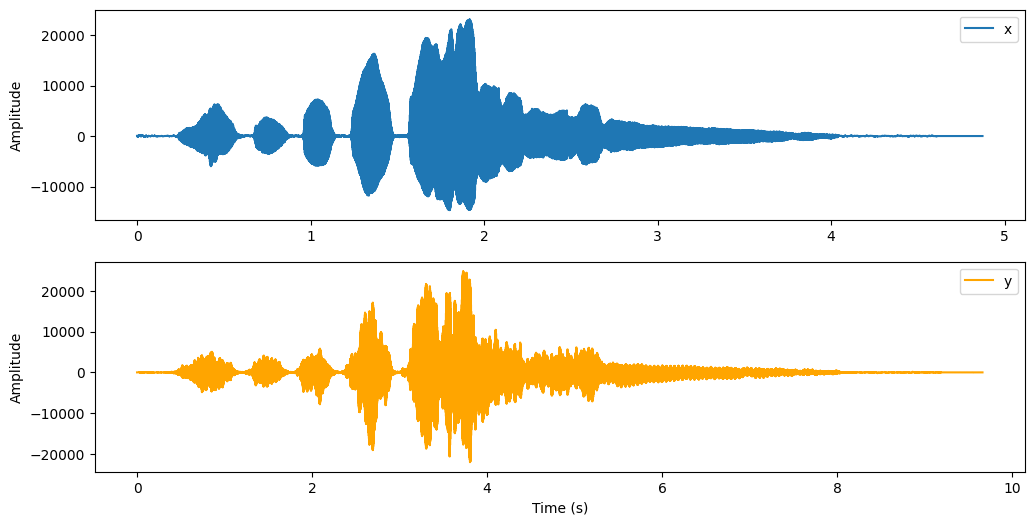

In [22]:
time_x = np.arange(0, x.size)/fs
time_y = np.arange(0, y.size)/fs

# plot the audio signal waveform
plt.figure(figsize=(12,6))
ax1 = plt.subplot(2, 1, 1)
plt.plot(time_x, x, label='x')
plt.ylabel('Amplitude')
plt.legend()
ax1 = plt.subplot(2, 1, 2)
plt.plot(time_y, y, color='orange', label='y')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

## Parte 4

Usando el phase-vocoder implemente las siguientes transformaciones de la señal de audio. Además de implementar **1)**, hacer _por lo menos_ una de las opciones **2)** y **3)**.

**_Nota:_** incluya en el informe los espectrogramas de las señales generadas y entregue también las señales de audio.

 1. **Transposición en frecuencia (pitch-shifting)**: Se desea una señal de la misma duración que la señal original, pero alterando su contenido espectral. Para ello deben realizarse dos acciones complementarias: un escalamiento en el tiempo y un cambio en la frecuencia de muestreo. Por ejemplo, si se desea subir/bajar el contenido espectral de la señal un semitono, se debe aumentar/disminuir la duración de la señal por un factor de $2^{\frac{1}{12}}$, y luego aumentar/disminuir la frecuencia de muestreo por el mismo factor, de modo de obtener una señal de la misma duración que la original.
 
_Elegir:_

 2. **Armonizador**: Utilizando el efecto de transposición en frecuencia sumar a la señal original una versión desplazada una quinta (factor de $2^{\frac{7}{12}}\simeq\frac{3}{2}$).
 
 $\qquad$ y/ó

 3. **Coro (_chorus_)**: Consiste en simular que la señal de voz de un único interprete es entonada por varias voces cantando al unísono (es una variación del efecto de armonización). Se deben superponer varias señales con pequeñas modificaciones de _pitch_ respecto al de la señal original y ligeramente distinto para cada uno. El cambio no debe ser mayor que un cuarto de semitono (factor de $2^{\frac{1}{48}}$).

In [23]:
def pitch_shift(x, semitones, L=2048, Ra=512):
    """
    Pitch shift a signal by a number of semitones.

    Args:
        x (np.array): Señal de entrada.
        semitones (int): Número de semitonos a cambiar (positivo = arriba, negativo = abajo).
        L (int, optional): Tamaño de la ventana para STFT en muestras.
        Ra (int, optional): Tamaño del salto de análisis en muestras.

    Returns:
        np.array: Señal pitch-shifted.
    """

    # Calculate pitch shift factor
    factor = 2.0 ** (semitones/12.0)
    
    # Synthesis hop size for time stretching
    Rs = int(Ra * factor)
    
    # phase vocoder - time-stretch the signal withouth changing pitch
    X_stft = analysis_STFT(x, L, Ra)
    y_stretched = synthesis_STFT_unwrap_phase(X_stft, L, Rs, Ra)
    
    # Resample to original length -> pitch shift effect
    M_original = len(x)
    y = signal.resample(y_stretched, M_original)
    
    return y

def harmonizer(x):
    """
    Generate harmony effect by pitch-shifting a signal up a perfect fifth (7 semitones)

    Args:
        x (np.array): Señal de entrada.

    Returns:
        np.array: Señal con efecto de armonía.
    """
    # Generar versión transpuesta, 7 semitonos arriba (una quinta)
    y_harmony = pitch_shift(x, semitones=7)
    
    # Mezclar señal original con armonía
    # Ajustar niveles: 70% original, 30% armonía
    y = 0.7 * x + 0.3 * y_harmony
    
    return y

def chorus(x, num_voices, pitch_step, L=2048, Ra=512):
    """
    Create chorus effect by combining multiple pitch-shifted versions.
    
    
    Args:
        x (np.array): Señal de entrada.
        num_voices (int): Número de voces a generar (incluyendo la original).
        pitch_step (float): Paso de pitch en semitonos.
            Ej: pitch_step = 1 genera un coro de voces a 1 semitono de diferencia cada voz.
        L (int, optional): Tamaño de la ventana para STFT en muestras.
        Ra (int, optional): Tamaño del salto de análisis en muestras.
        
    Returns:
        np.array: Señal con efecto de coro.
    """
    y = np.zeros(len(x))
    
    for factor in np.linspace(-pitch_step * (num_voices // 2), pitch_step * (num_voices // 2), num_voices):
        
        # Generate pitch-shifted voice
        voice = pitch_shift(x, factor, L, Ra)
        
        # Add to output with slight amplitude reduction
        if factor == 0:
            y += voice      # Original voice without amplitude reduction
        else:
            y += 0.7 * voice
    
    # Normalize output
    y /= num_voices
    
    return y

In [24]:
def save_audio(filename, data, sr):
    """
    Guarda el audio normalizado correctamente
    
    Args:
        filename (str): Nombre del archivo
        y (np.array): Señal de audio
        sr (int): Frecuencia de muestreo
        dtype: Tipo de datos para guardar (np.float32 o np.int16)
    """
    # Normalizamos primero
    data = data / np.max(np.abs(data))
    
    # Guardamos el archivo
    io.wavfile.write(filename, sr, data)

In [25]:
semitones = -2
y_pitched = pitch_shift(x, semitones)
save_audio(dir_files+'pitch_shift.wav', y_pitched, fs)

Audio(y_pitched, rate=fs)

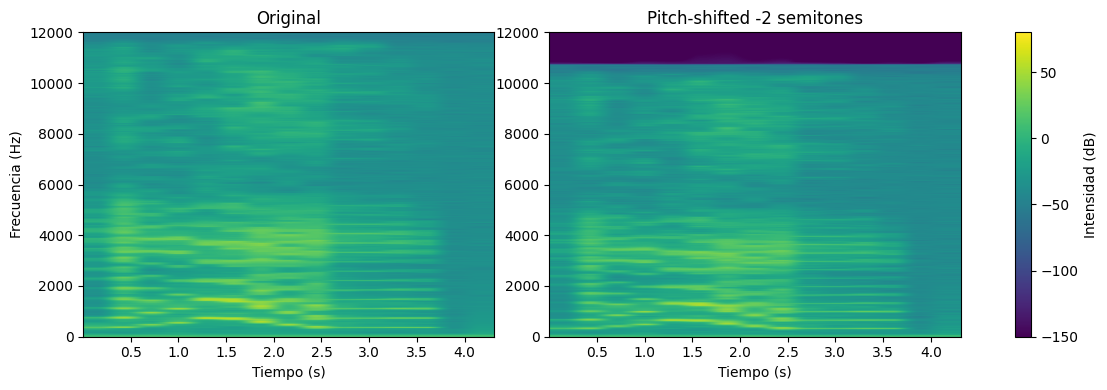

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
vmin, vmax = -150, 80

spec, freqs, t, im = ax[0].specgram(x, Fs=sr, NFFT=7024, vmin=vmin, vmax=vmax)
ax[0].set_xlabel('Tiempo (s)')
ax[0].set_ylabel('Frecuencia (Hz)')
ax[0].set_title('Original')

spec, freqs, t, im = ax[1].specgram(y_pitched, Fs=sr, NFFT=7024, vmin=vmin, vmax=vmax)
ax[1].set_xlabel('Tiempo (s)')
ax[1].set_title(f'Pitch-shifted {semitones} semitones')

plt.tight_layout()
plt.colorbar(im, ax=ax, label='Intensidad (dB)', orientation='vertical')
plt.savefig(dir_files+'ej4-pitch-shifted.png', dpi=300)
plt.show()

In [27]:
y_harmony = harmonizer(x)
save_audio(dir_files+'harmony.wav', y_harmony, fs)

Audio(y_harmony, rate=fs)

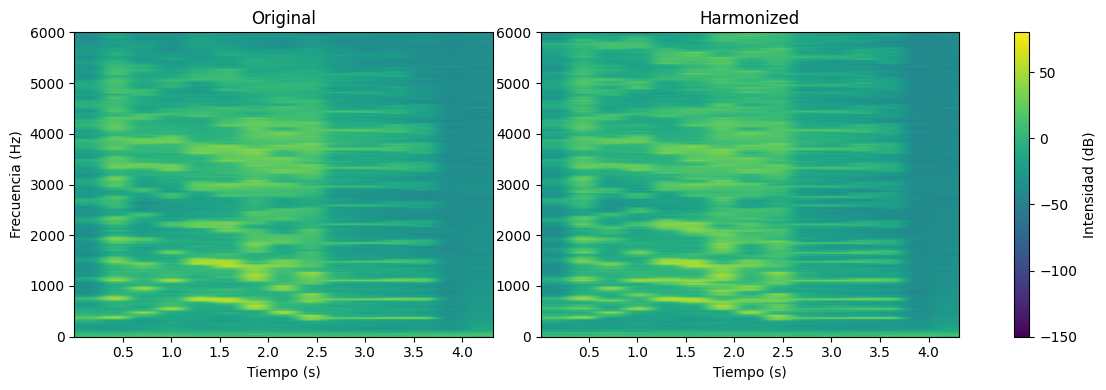

In [28]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
vmin, vmax = -150, 80

spec, freqs, t, im = ax[0].specgram(x, Fs=sr, NFFT=7024, vmin=vmin, vmax=vmax)
ax[0].set_xlabel('Tiempo (s)')
ax[0].set_ylabel('Frecuencia (Hz)')
ax[0].set_title('Original')
ax[0].set_ylim(0, 6000)

spec, freqs, t, im = ax[1].specgram(y_harmony, Fs=sr, NFFT=7024, vmin=vmin, vmax=vmax)
ax[1].set_xlabel('Tiempo (s)')
ax[1].set_title("Harmonized")
ax[1].set_ylim(0, 6000)

plt.tight_layout()
plt.colorbar(im, ax=ax, label='Intensidad (dB)', orientation='vertical')
plt.savefig(dir_files+'ej4-harmony.png', dpi=300)
plt.show()

In [29]:
y_chorus = chorus(x, num_voices=7, pitch_step=1/4)
save_audio(dir_files+'chorus.wav', y_chorus, fs)

Audio(y_chorus, rate=fs)

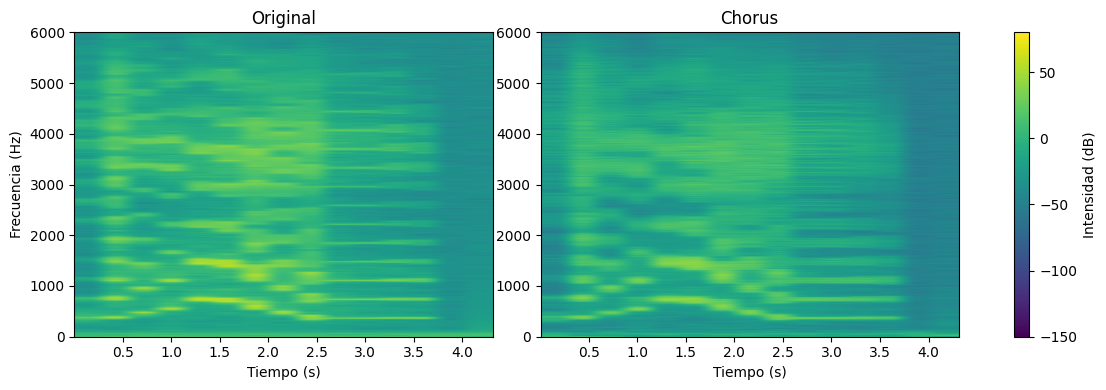

In [30]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
vmin, vmax = -150, 80

spec, freqs, t, im = ax[0].specgram(x, Fs=sr, NFFT=7024, vmin=vmin, vmax=vmax)
ax[0].set_xlabel('Tiempo (s)')
ax[0].set_ylabel('Frecuencia (Hz)')
ax[0].set_title('Original')
ax[0].set_ylim(0, 6000)

spec, freqs, t, im = ax[1].specgram(y_chorus, Fs=sr, NFFT=7024, vmin=vmin, vmax=vmax)
ax[1].set_xlabel('Tiempo (s)')
ax[1].set_title('Chorus')
ax[1].set_ylim(0, 6000)

plt.tight_layout()
plt.colorbar(im, ax=ax, label='Intensidad (dB)', orientation='vertical')
plt.savefig(dir_files+'ej4-chorus.png', dpi=300)
plt.show()

# Referencias

[1] L. R. Rabiner and R. W. Schafer, *Theory and Applications of Digital Speech Processing*. Prentice
Hall, 1st ed., 2011.

[2] J. Laroche and M. Dolson, “Improved phase vocoder time-scale modification of audio,” *IEEE Transac-
tions on Speech and Audio processing*, vol. 7, no. 3, pp. 323–332, 1999.

[3] A. Gotzen, N. Bernardin, and D. Arfib., “Traditional implementations of a phase-vocoder: The tricks
of the trade,” in *International Conference on Digital Audio Effects, Italy*, Dec. 2000